<a href="https://colab.research.google.com/github/sanj456/sanj456/blob/main/MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The movie list range from Dickson Greeting (1891) to movies of 2015. With the total of 27278 movies.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
movie_ids_titles=pd.read_csv("movies.csv")
movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movie_ids_titles.shape

(27278, 3)

the movies have been rated by 138493 users on the scale of 1 to 5

In [6]:
movie_ids_ratings=pd.read_csv("ratings.csv")
movie_ids_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
movie_ids_ratings.shape

(20000263, 4)

Data Processing - We need dataframe that consists of data

In [8]:
movie_ids_titles.drop(['genres'],inplace=True,axis=1)
movie_ids_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
movie_ids_ratings.drop(['timestamp'],inplace=True,axis=1)
movie_ids_ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [10]:
merged_movie_df=pd.merge(movie_ids_ratings,movie_ids_titles,on='movieId')
merged_movie_df.head()

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,5,2,3.0,Jumanji (1995)
2,13,2,3.0,Jumanji (1995)
3,29,2,3.0,Jumanji (1995)
4,34,2,3.0,Jumanji (1995)


Data Visualization - We are going to group the data by title to get the ratings


In [11]:
merged_movie_df.groupby('title').describe()

userId                \
                                                    count          mean   
title                                                                     
"Great Performances" Cats (1998)                    155.0  66414.658065   
#chicagoGirl: The Social Network Takes on a Dic...    3.0  65392.666667   
$ (Dollars) (1971)                                   24.0  83316.958333   
$5 a Day (2008)                                      39.0  57626.461538   
$9.99 (2008)                                         55.0  73360.909091   
...                                                   ...           ...   
À propos de Nice (1930)                               4.0  99002.250000   
Árido Movie (2005)                                    1.0  32391.000000   
Åsa-Nisse - Wälkom to Knohult (2011)                  2.0  98726.500000   
Üvegtigris (2001)                                     1.0  84641.000000   
貞子3D (2012)                                           1.0  97059.000000   

                                                                           \
                                                             std      min   
title                                                                       
"Great Performances" Cats (1998)                    41347.840957    266.0   
#chicagoGirl: The Social Network Takes on a Dic...  46941.761475  28419.0   
$ (Dollars) (1971)                                  45647.858056  10575.0   
$5 a Day (2008)                                     45037.529547   2348.0   
$9.99 (2008)                                        39421.315749   9379.0   
...                                                          ...      ...   
À propos de Nice (1930)                             36431.945912  48527.0   
Árido Movie (2005)                                           NaN  32391.0   
Åsa-Nisse - Wälkom to Knohult (2011)                29741.618323  77696.0   
Üvegtigris (2001)                                            NaN  84641.0   
貞子3D (2012)                                                  NaN  97059.0   

                                                                        \
                                                         25%       50%   
title                                                                    
"Great Performances" Cats (1998)                    30407.00   60771.0   
#chicagoGirl: The Social Network Takes on a Dic...  38986.50   49554.0   
$ (Dollars) (1971)                                  34700.25  100171.5   
$5 a Day (2008)                                     18153.00   47149.0   
$9.99 (2008)                                        42869.00   68279.0   
...                                                      ...       ...   
À propos de Nice (1930)                             85526.75  107789.0   
Árido Movie (2005)                                  32391.00   32391.0   
Åsa-Nisse - Wälkom to Knohult (2011)                88211.25   98726.5   
Üvegtigris (2001)                                   84641.00   84641.0   
貞子3D (2012)                                         97059.00   97059.0   

                                                                         \
                                                          75%       max   
title                                                                     
"Great Performances" Cats (1998)                    105500.00  138409.0   
#chicagoGirl: The Social Network Takes on a Dic...   83879.50  118205.0   
$ (Dollars) (1971)                                  126591.25  138409.0   
$5 a Day (2008)                                      93804.50  138409.0   
$9.99 (2008)                                        106962.00  138409.0   
...                                                       ...       ...   
À propos de Nice (1930)                             121264.50  131904.0   
Árido Movie (2005)                                   32391.00   32391.0   
Åsa-Nisse - Wälkom to Knohult (2011)                109241.

In [12]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)                               2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013)    3.666667
$ (Dollars) (1971)                                             2.833333
$5 a Day (2008)                                                2.871795
$9.99 (2008)                                                   3.009091
Name: rating, dtype: float64

Now we are going to sort the movie titles in descending order of the average user rating

In [13]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Prom Queen: The Marc Hall Story (2004)                        5.0
The Garden of Sinners - Chapter 5: Paradox Paradigm (2008)    5.0
Death of a Nation - The Timor Conspiracy (1994)               5.0
Poison (1951)                                                 5.0
Sun Kissed (2012)                                             5.0
Name: rating, dtype: float64

Now we are going to print the descending order of the movies in their rating count

In [14]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

A movie is a good movie when it gets a good rating in large amount of numbers.
So we are going to create a dataframe that shows the title , mean rating and the rating counts

In [15]:
movie_rating_mean_count=pd.DataFrame(columns=['rating_mean','rating_count'])

movie_rating_mean_count["rating_mean"]=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count["rating_count"]=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
"""Great Performances"" Cats (1998)",2.748387,155
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55


Now we are going to plot a histogram to see the average ratings how they are distributed

<Axes: >

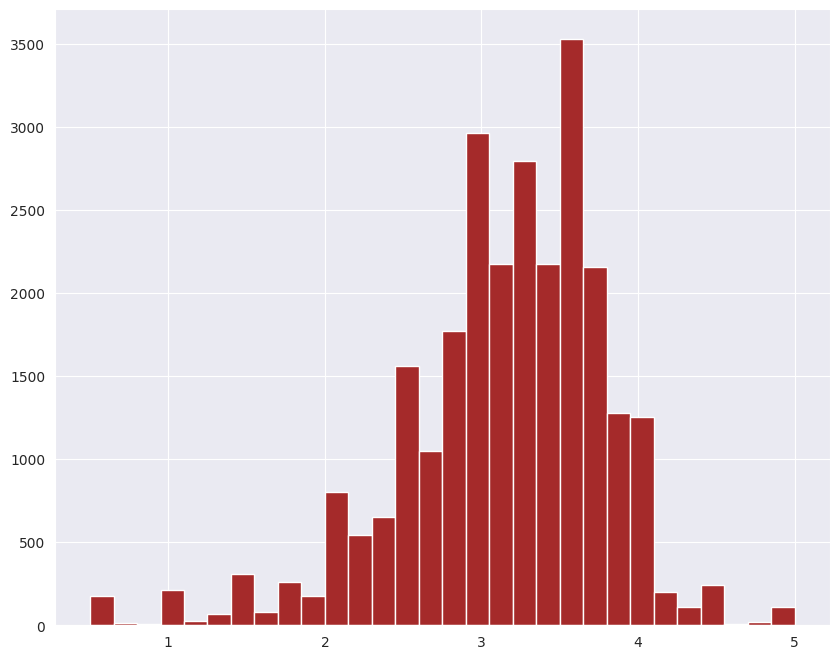

In [16]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=30, color='brown')

**In the above histogram, most of the movies have an average rating between 3 and 4**

Distribution of rating counts

<Axes: >

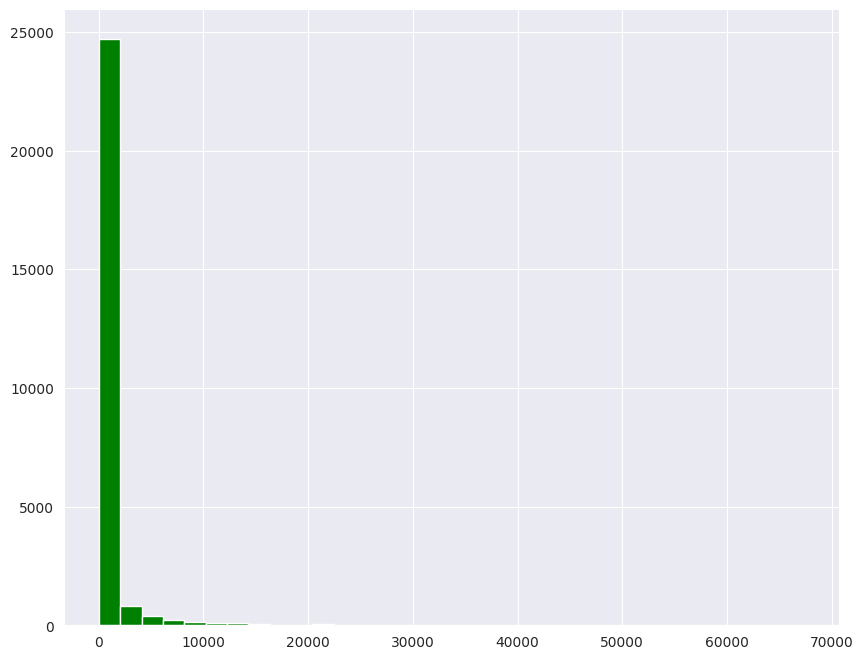

In [17]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_count'].hist(bins=33, color='green')

Relationship between mean ratings and rating counts of a movie

<Axes: xlabel='rating_mean', ylabel='rating_count'>

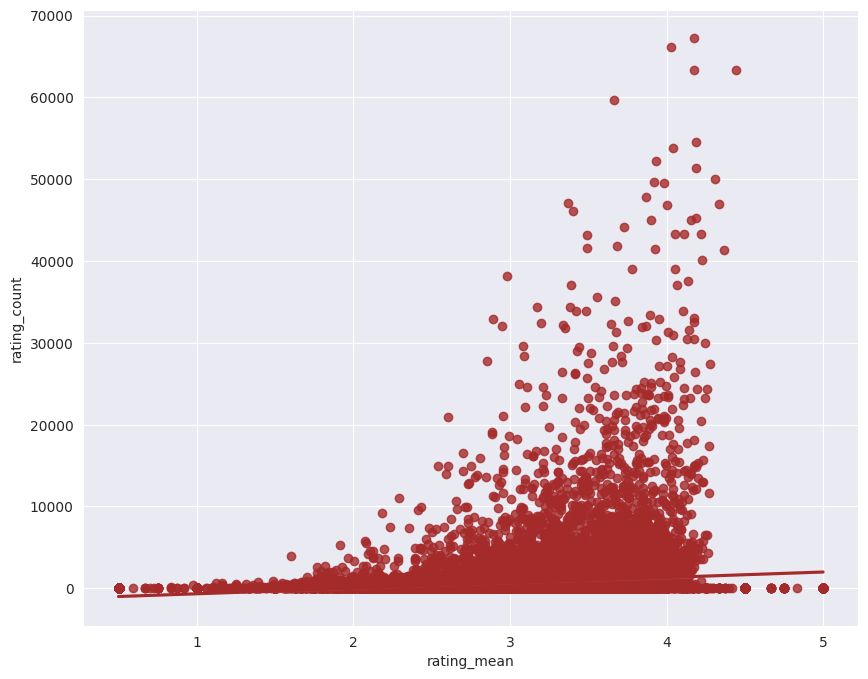

In [18]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x='rating_mean',y='rating_count',data=movie_rating_mean_count,color='brown')

From the above graph we can that in the top right corner the dots indicate the movies with higher number of rating counts so that also tend to have higher mean rating.


In [19]:
movie_rating_mean_count.sort_values('rating_count',ascending=False).head()

,rating_mean,rating_count
title,,
Pulp Fiction (1994),4.174231,67310
Forrest Gump (1994),4.029000,66172
"Shawshank Redemption, The (1994)",4.446990,63366
"Silence of the Lambs, The (1991)",4.177057,63299
Jurassic Park (1993),3.664741,59715


# **Item Based Collaborative Filtering**

In [ ]:
user_movie_rating_matrix=merged_movie_df.pivot_table(index='userId',columns='title',values='rating')



<ipython-input-20-8f0c43e3d72c>:1: PerformanceWarning: The following operation may generate 3701779397 cells in the resulting pandas object.
  user_movie_rating_matrix=merged_movie_df.pivot_table(index='userId',columns='title',values='rating')


In [ ]:
user_movie_rating_matrix

In [ ]:
user_movie_rating_matrix.shape

(18407, 17846)

The Dataset contains 18407 unique users and 17846 unique movies

Now we are going to find the movie recommendation based on a single and then on multiple movies.


In [ ]:
pulp_fiction_ratings=user_movie_rating_matrix['Pulp Fiction (1994)']


NameError: name 'user_movie_rating_matrix' is not defined

In [ ]:
pulp_fiction_correlations=pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])



NameError: name 'user_movie_rating_matrix' is not defined

In [ ]:
pulp_fiction_correlations.sort_values(by='pf_corr',ascending=False).head(5)

,pf_corr
title,
Ghost Machine (2010),1.0
Campfire Tales (1997),1.0
Unstoppable (2004),1.0
"Crawling Hand, The (1963)",1.0
Memento Mori (Yeogo goedam II) (1999),1.0


In [ ]:
pulp_fiction_correlations=pulp_fiction_correlations.join(movie_rating_mean_count['rating_count'])

pulp_fiction_correlations.head()

,pf_corr,rating_count
title,,
"""Great Performances"" Cats (1998)",0.327327,23
$ (Dollars) (1971),NaN,2
$5 a Day (2008),0.944911,10
$9.99 (2008),NaN,3
'71 (2014),0.229332,7


In [ ]:
pulp_fiction_correlations.dropna(inplace=True)



In [ ]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Ghost Machine (2010),1.0,2
Campfire Tales (1997),1.0,3
Unstoppable (2004),1.0,7
"Crawling Hand, The (1963)",1.0,2
Memento Mori (Yeogo goedam II) (1999),1.0,4


In [ ]:
pulp_fiction_correlations_50=pulp_fiction_correlations[pulp_fiction_correlations['rating_count']>50].sort_values("pf_corr",ascending=False)

pulp_fiction_correlations_50.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,9095
Memories of Murder (Salinui chueok) (2003),0.607961,87
Triumph of the Will (Triumph des Willens) (1934),0.520572,75
Reservoir Dogs (1992),0.513453,3678
"Class, The (Entre les murs) (2008)",0.510026,56


In [ ]:
all_movie_correlations=user_movie_rating_matrix.corr(method="pearson",min_periods=50)


NameError: name 'user_movie_rating_matrix' is not defined

In [ ]:
all_movie_correlations.head()

In [ ]:
movie_data=[['The Conjuring (2013)',4.0],['Interstellar (2014)',4.0]]

test_movies=pd.DataFrame(movie_data,columns=['Movie_Name','Movie_rating'])

test_movies.head()

NameError: name 'pd' is not defined

In [ ]:
print(test_movies['Movie_Name'][0])
print(test_movies['Movie_Rating'][0])